# 0. Packages and data

In [23]:
path='G:/Shared drives/BeStarsMiMeS/ScienceFiles/' #Patrick's google file stream path

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol

In [25]:
from matplotlib.backends.backend_pdf import PdfPages


In [26]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [27]:
import itertools


### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")
models=['hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsif+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_maskdepth0.02_tellClean',
 'normalized_CleanAsif+tellClean',
 'normalized_CleanAsifTweak+tellClean', 
 'hybrid_SuperCleanAsif+tellClean',
 'hybrid_SuperCleanAsifTweak+tellClean',
 'normalized_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsifTweak+tellClean']

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\964177097.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\964177097.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\964177097.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colu

hybrid_maskdepth0.01_tellClean 84.35932908044447
254.1762959158328
hybrid_CleanAsif+tellClean 134.89239564798845
413.4153251294809
normalized_CleanAsif+tellClean 138.59540138392998
443.19451704899546


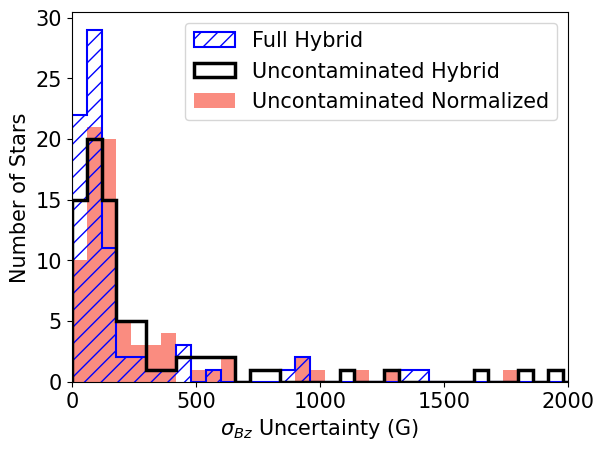

In [28]:
#makes some histograms
models=['hybrid_maskdepth0.01_tellClean','hybrid_CleanAsif+tellClean',
 'normalized_CleanAsif+tellClean']
for i in range(len(models)):

  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])

  binwidth=60
  bins=np.arange(0, max(v_sig) + binwidth, binwidth)
  
  if i==0:
    plt.hist(v_sig,label='Full Hybrid',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')

  if i==1: 
    plt.hist(v_sig,label='Uncontaminated Hybrid',bins=bins,alpha=1,histtype='step',color='black',linewidth=2.5)
  
  if i==2: 
    plt.hist(v_sig,label='Uncontaminated Normalized',bins=bins,alpha=0.9,histtype='bar',color='Salmon',linewidth=1)

  print(models[i],np.median(np.abs(v_sig)))
  print(np.mean(np.abs(v_sig)))

  plt.xlabel('$\sigma_{Bz}$ Uncertainty (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,10)
  plt.xlim(0,2000)
  plt.legend()

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\3913601016.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\3913601016.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\3913601016.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

hybrid_maskdepth0.01_tellClean 84.35932908044447
254.1762959158328
hybrid_CleanAsifTweak+tellClean 110.84655026253412
580.4274687938495
normalized_CleanAsifTweak+tellClean 96.78024797159273
244.97368518294368


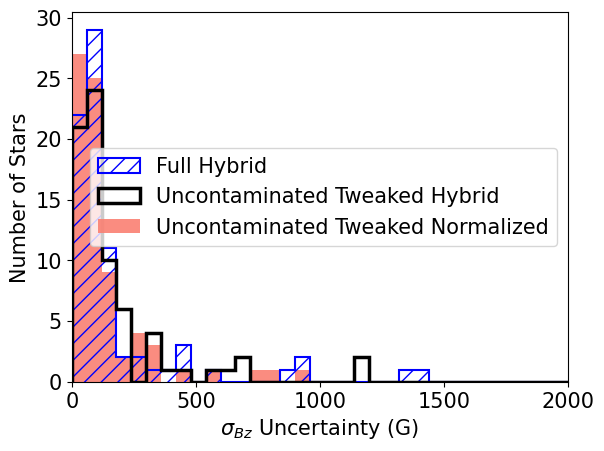

In [29]:
models=['hybrid_maskdepth0.01_tellClean','hybrid_CleanAsifTweak+tellClean',
 'normalized_CleanAsifTweak+tellClean']
#makes some histograms
for i in range(len(models)):

  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])

  binwidth=60
  bins=np.arange(0, max(v_sig) + binwidth, binwidth)
  
  if i==0:
    plt.hist(v_sig,label='Full Hybrid',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')

  if i==1: 
    plt.hist(v_sig,label='Uncontaminated Tweaked Hybrid',bins=bins,alpha=1,histtype='step',color='black',linewidth=2.5)
  
  if i==2: 
    plt.hist(v_sig,label='Uncontaminated Tweaked Normalized',bins=bins,alpha=0.9,histtype='bar',color='Salmon',linewidth=1)

  print(models[i],np.median(np.abs(v_sig)))
  print(np.mean(np.abs(v_sig)))

  plt.xlabel('$\sigma_{Bz}$ Uncertainty (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,10)
  plt.xlim(0,2000)
  plt.legend()

84.35932908044447
254.1762959158328


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_sig=np.abs(model.groupby("Star").median()['N1 bz sig (G)'])


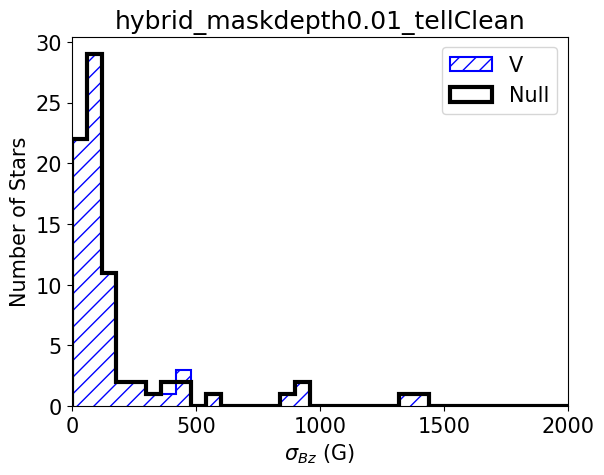

134.89239564798845
413.4153251294809


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_sig=np.abs(model.groupby("Star").median()['N1 bz sig (G)'])


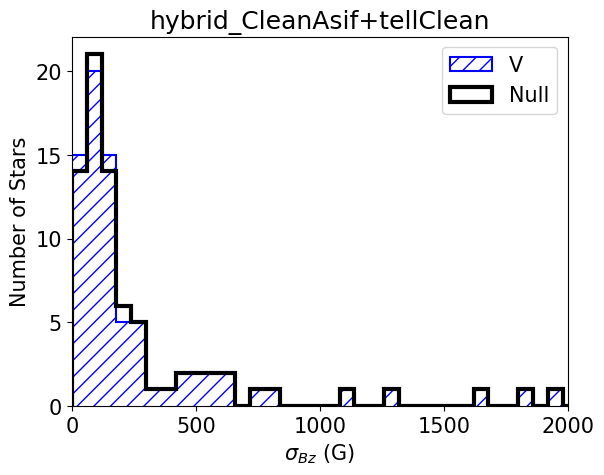

138.59540138392998
443.19451704899546


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_sig=np.abs(model.groupby("Star").median()['N1 bz sig (G)'])


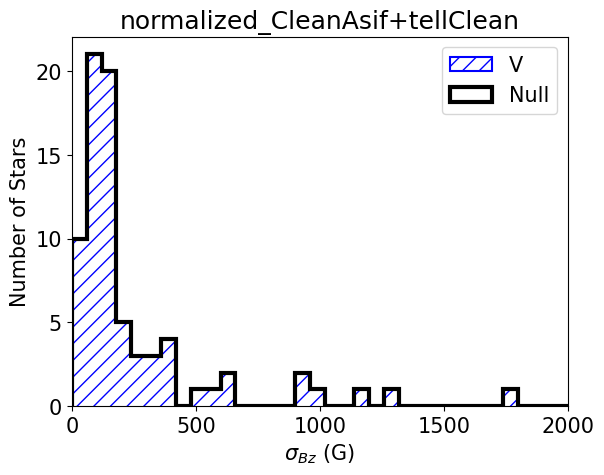

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])


110.84655026253412
580.4274687938495


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_sig=np.abs(model.groupby("Star").median()['N1 bz sig (G)'])


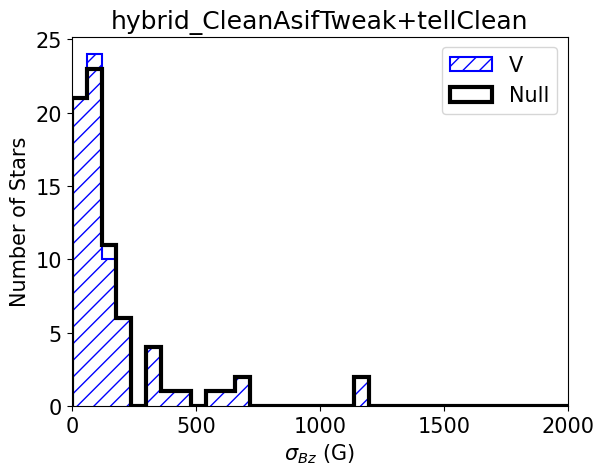

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_sig=np.abs(model.groupby("Star").median()['N1 bz sig (G)'])


96.78024797159273
244.97368518294368


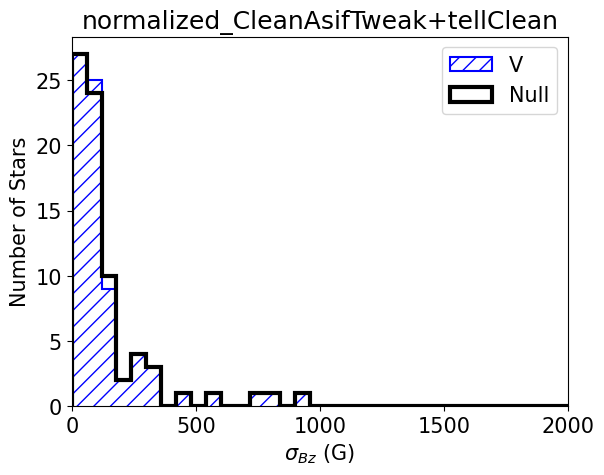

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sig=np.abs(model.groupby("Star").median()['V bz (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\1361633639.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_sig=np.abs(model.groupby("Star").median()['N1 bz (G)'])


36.06887422447717
158.31057933121684


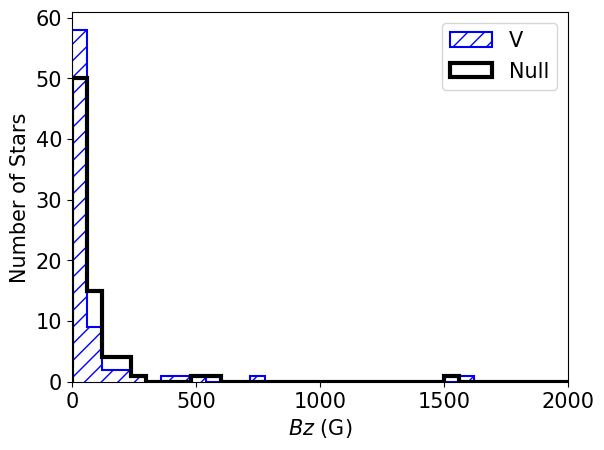

In [30]:
#makes some histograms
models=['hybrid_maskdepth0.01_tellClean','hybrid_CleanAsif+tellClean',
 'normalized_CleanAsif+tellClean','hybrid_CleanAsifTweak+tellClean',
 'normalized_CleanAsifTweak+tellClean']

for i in range(len(models)):
    model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
    v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])

    model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
    N_sig=np.abs(model.groupby("Star").median()['N1 bz sig (G)'])

    binwidth=60
    bins=np.arange(0, max(v_sig) + binwidth, binwidth)

    plt.hist(v_sig,label='V',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')
    plt.hist(N_sig,label='Null',bins=bins,alpha=1.0,histtype='step',color='black',linewidth=3)

    print(np.median(np.abs(v_sig)))
    print(np.mean(np.abs(v_sig)))

    plt.xlabel('$\sigma_{Bz}$ (G)',size=15)
    plt.ylabel('Number of Stars',size=15)
    #plt.ylim(0,10)
    plt.xlim(0,2000)
    plt.legend()
    plt.title('{}'.format(models[i]))
    plt.show()

model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[0]))
v_sig=np.abs(model.groupby("Star").median()['V bz (G)'])

model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[0]))
N_sig=np.abs(model.groupby("Star").median()['N1 bz (G)'])

binwidth=60
bins=np.arange(0, max(v_sig) + binwidth, binwidth)

plt.hist(v_sig,label='V',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')
plt.hist(N_sig,label='Null',bins=bins,alpha=1.0,histtype='step',color='black',linewidth=3)

print(np.median(np.abs(v_sig)))
print(np.mean(np.abs(v_sig)))

plt.xlabel('$Bz$ (G)',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,10)
plt.xlim(0,2000)
plt.legend()
plt.show()

In [31]:
models=['hybrid_maskdepth0.01_tellClean','hybrid_CleanAsif+tellClean',
 'normalized_CleanAsif+tellClean','hybrid_CleanAsifTweak+tellClean',
 'normalized_CleanAsifTweak+tellClean']
WBstars=['hd23302','hd23630','hd33328','hd138749','hd164284','hd170783','hd175869','hd189687','hd191610']
i=0
j=2
k=1

f=3
g=4

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))

modelall3=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[k]))

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))

modelall4=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[f]))

modelall5=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[g]))

WBvsig=[]
for m in range(modelall3.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            print(WBstars[n])
            WBvsig.append(modelall1.groupby("Star").median()['V bz sig (G)'][m])

WBvsig2=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall2.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig2.append(modelall2.groupby("Star").median()['V bz sig (G)'][m])

WBvsig3=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall3.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig3.append(modelall3.groupby("Star").median()['V bz sig (G)'][m])            

WBvsig4=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall4.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig4.append(modelall4.groupby("Star").median()['V bz sig (G)'][m])

WBvsig5=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall5.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig5.append(modelall5.groupby("Star").median()['V bz sig (G)'][m])       


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  for m in range(modelall3.groupby("Star").median()['V bz sig (G)'].size):
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specif

hd138749
hd164284
hd170783
hd175869
hd189687


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either sp

hd191610


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either sp

hd23302
hd23630
hd33328


C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\4134965508.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either sp

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\495494560.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sigall1=3*np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\495494560.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sigall3=3*np.abs(modelall3.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\495494560.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_on

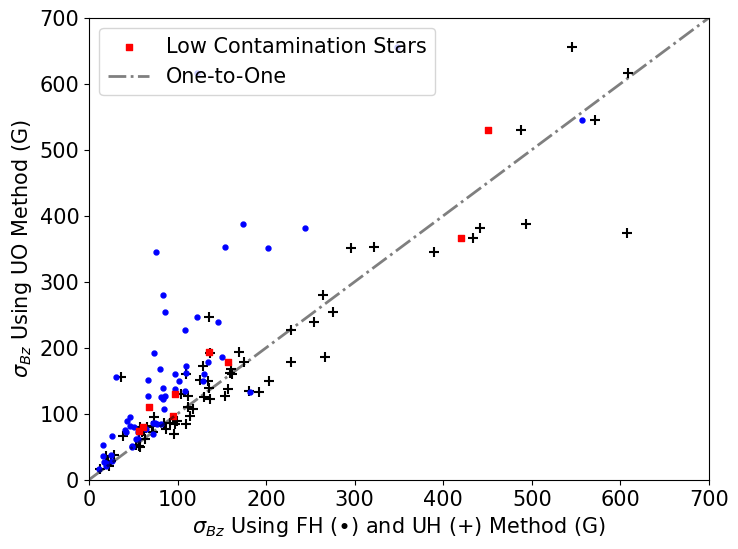

In [32]:
plt.rcParams['text.latex.preamble']=r"\usepackage{xcolor}"


i=0
j=2
k=1

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=3*np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])

modelall3=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[k]))
v_sigall3=3*np.abs(modelall3.groupby("Star").median()['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=3*np.abs(modelall2.groupby("Star").median()['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall3/3, v_sigall2/3, color='black',marker='+',s=50)
ax.scatter(v_sigall1/3, v_sigall2/3,color='b',marker='.',s=50)

#ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.scatter(WBvsig, WBvsig2, label='Low Contamination Stars',color='r',marker='s',s=15)
ax.plot([0,1500],[0,1500],label='One-to-One',color='black',linestyle='-.',linewidth=2,alpha=0.5)
ax.legend(loc=2)
ax.set_xlabel(r'$\sigma_{Bz}$ Using FH ($\bullet$) and UH ($+$) Method (G)')
ax.set_ylabel(r'$\sigma_{Bz}$ Using UO Method (G)')
#ax.set_title('3sig Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,700)
ax.set_ylim(0,700)
plt.show()

C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\3208817292.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sigall1=3*np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\3208817292.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v_sigall3=3*np.abs(modelall3.groupby("Star").median()['V bz sig (G)'])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_102852\3208817292.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric

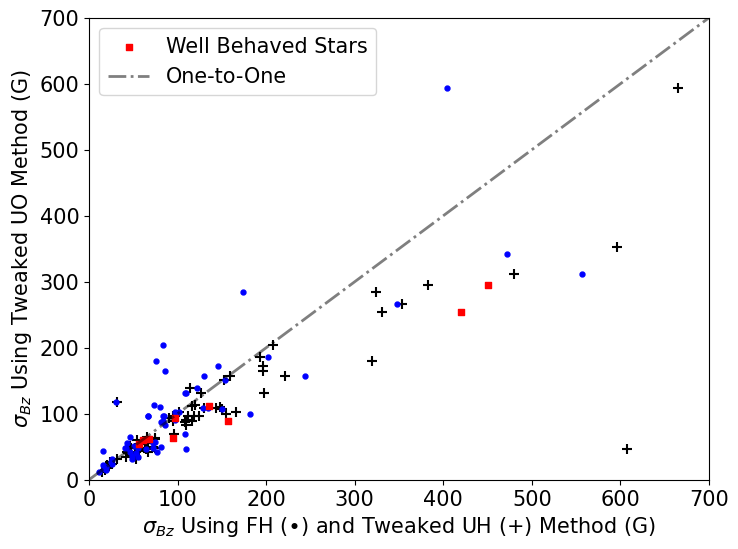

In [33]:
plt.rcParams['text.latex.preamble']=r"\usepackage{xcolor}"


i=0
j=4
k=3

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=3*np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])

modelall3=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[k]))
v_sigall3=3*np.abs(modelall3.groupby("Star").median()['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=3*np.abs(modelall2.groupby("Star").median()['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall3/3, v_sigall2/3, color='black',marker='+',s=50)
ax.scatter(v_sigall1/3, v_sigall2/3,color='b',marker='.',s=50)

#ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.scatter(WBvsig, WBvsig5, label='Well Behaved Stars',color='r',marker='s',s=15)
ax.plot([0,1500],[0,1500],label='One-to-One',color='black',linestyle='-.',linewidth=2,alpha=0.5)
ax.legend()
ax.set_xlabel(r'$\sigma_{Bz}$ Using FH ($\bullet$) and Tweaked UH ($+$) Method (G)')
ax.set_ylabel(r'$\sigma_{Bz}$ Using Tweaked UO Method (G)')
#ax.set_title('3sig Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,700)
ax.set_ylim(0,700)
plt.show()

# 1. Comparison with Normal B Stars


In [5]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

MD=StarData['HD Num'][np.where(StarData['Det Flag']=='MD')[0]].values
DD=StarData['HD Num'][np.where(StarData['Det Flag']=='DD')[0]].values
stars=StarData.groupby("HD Num",as_index=False).median()

MBstar_vsini=np.array([])
MBstar_Bl=np.array([])
MBstar_T=np.array([])
MBstar_name=np.array([])
for i in range(MD.size):
    MBstar_vsini = np.append(MBstar_vsini,stars['vsini'][stars['HD Num']==MD[i]])
    MBstar_Bl = np.append(MBstar_Bl,stars['Bl'][stars['HD Num']==MD[i]])
    MBstar_T = np.append(MBstar_T,stars['Masktemp'][stars['HD Num']==MD[i]])
    MBstar_name = np.append(MBstar_name,stars['HD Num'][stars['HD Num']==MD[i]])

for i in range(DD.size):
    MBstar_vsini = np.append(MBstar_vsini,stars['vsini'][stars['HD Num']==DD[i]])
    MBstar_Bl = np.append(MBstar_Bl,stars['Bl'][stars['HD Num']==DD[i]])
    MBstar_T = np.append(MBstar_T,stars['Masktemp'][stars['HD Num']==DD[i]])
    MBstar_name = np.append(MBstar_name,stars['HD Num'][stars['HD Num']==DD[i]])

Bstar_vsini=np.array([])
Bstar_Bl=np.array([])
Bstar_T=np.array([])
Bstar_name=np.array([])
for i in range(stars['HD Num'].size):
    if (stars['HD Num'][i] not in MD) and (stars['HD Num'][i] not in DD):
        Bstar_vsini = np.append(Bstar_vsini,stars['vsini'][i])
        Bstar_Bl = np.append(Bstar_Bl,stars['Bl'][i])
        Bstar_T = np.append(Bstar_T,stars['Masktemp'][i])
        Bstar_name = np.append(Bstar_name,stars['HD Num'][i])



C:\Users\pjsta\AppData\Local\Temp\ipykernel_34028\1048446487.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars=StarData.groupby("HD Num",as_index=False).median()


In [7]:
print('B star 3sig Upper limit median',np.median(np.abs(Bstar_Bl)),'mean',np.mean(np.abs(Bstar_Bz)))
print('Magnetic B star 3sig Upper limit median',np.median(np.abs(MBstar_Bl)),'mean',np.mean(np.abs(MBstar_Bz)))
#print('Be star 3sig Upper limit median',np.median(np.abs(v_sig)),'mean',np.mean(np.abs(v_sig)))
#np.median(v_sig)

MBstar_Bz.size

#not random sample --> detection bias

NameError: name 'Bstar_Bz' is not defined

## 1.1 3 Sigma Bz histogram

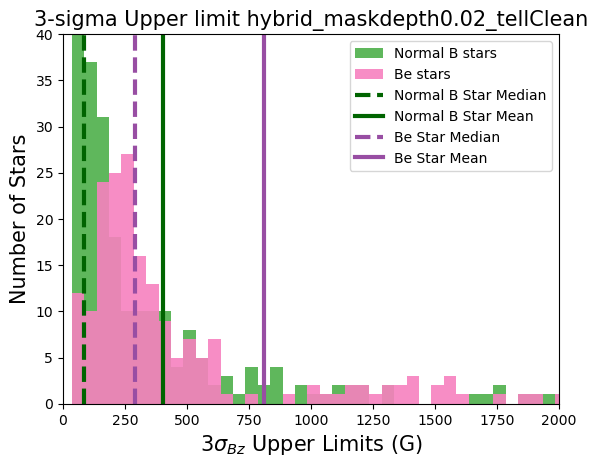

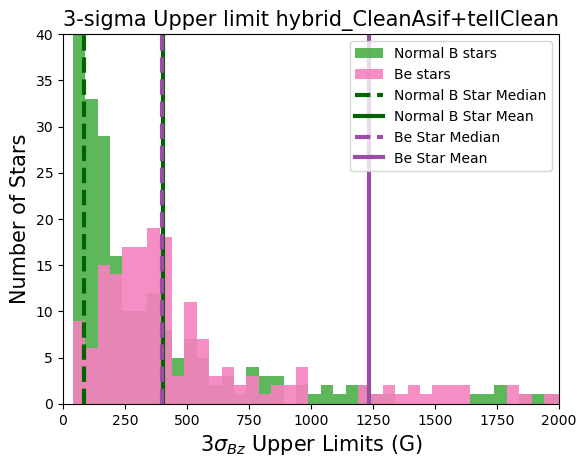

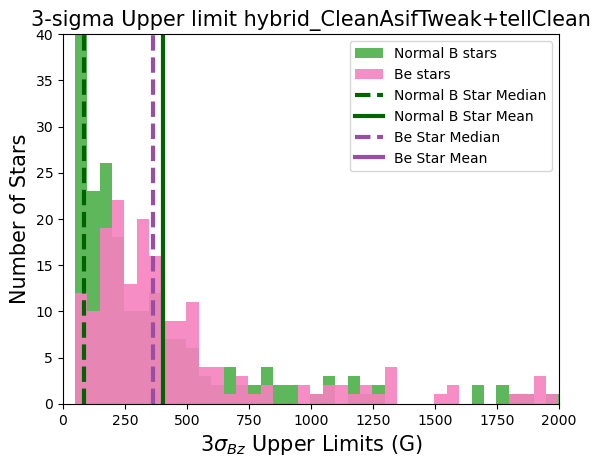

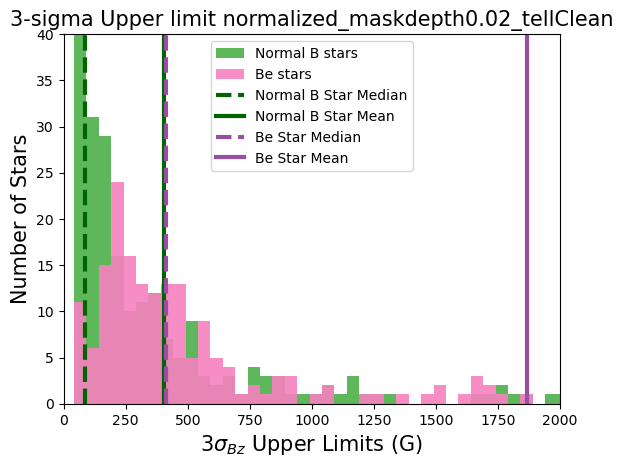

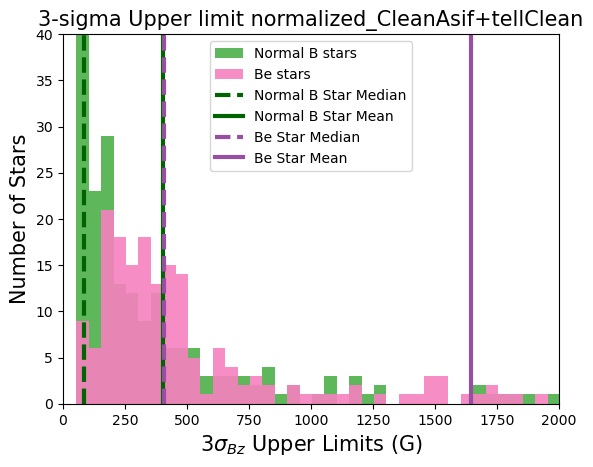

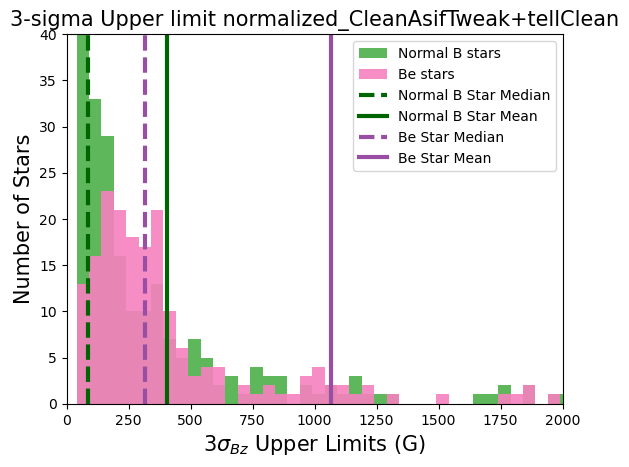

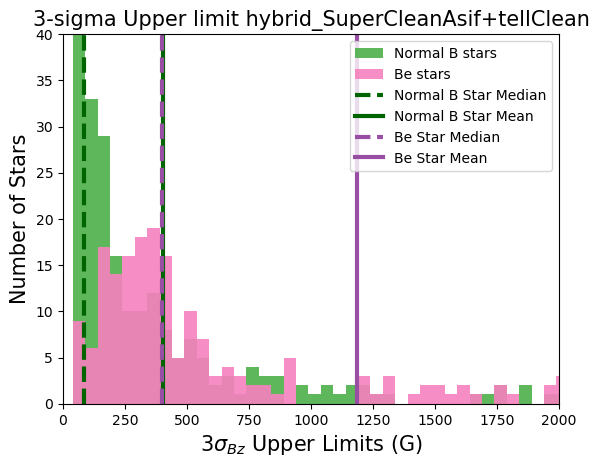

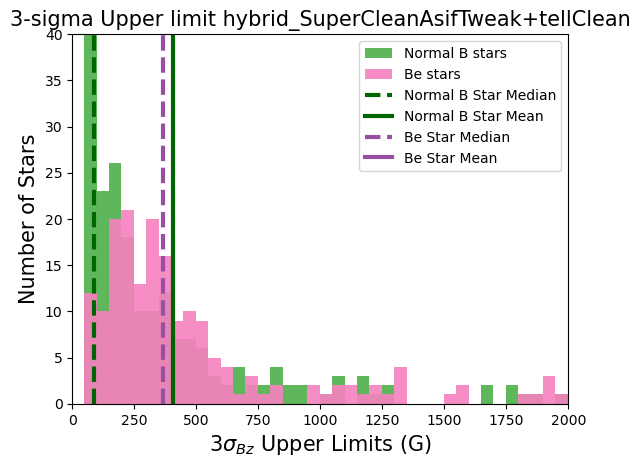

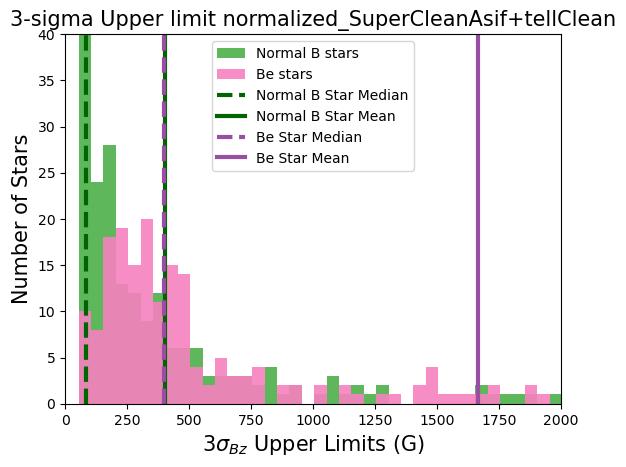

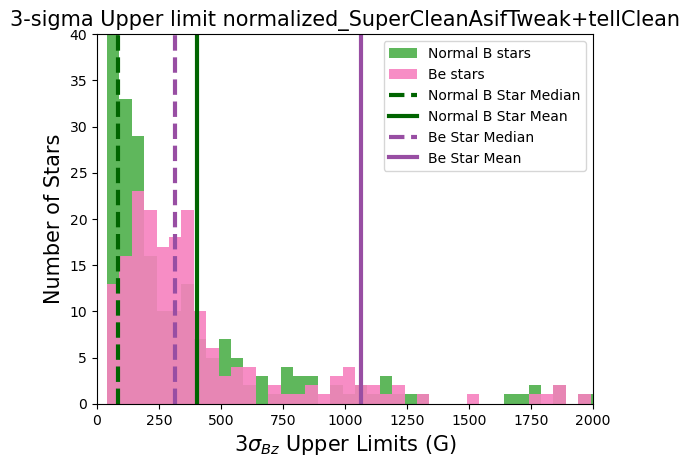

"\n  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)\n  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')\n  plt.xlabel('$3\\sigma_{Bz}$ Upper Limits',size=15)\n  plt.ylabel('Number of Stars',size=15)\n  plt.title('3-sigma Upper limit (No Scaling)',size=15)\n  plt.legend()\n  plt.show()\n\n\n  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)\n  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')\n  plt.xlabel('$3\\sigma_{Bz}$ Upper Limits',size=15)\n  plt.ylabel('Number of Stars',size=15)\n  plt.ylim(0,50)\n  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)\n  plt.legend()\n  plt.show()\n"

In [13]:
#makes some histograms

for i in range(len(models)):

  #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model['V bz sig (G)'])*3.0

  binwidth=50
  bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
  
  #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  #plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,50)
  #plt.xlim(0,2000)
  #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
  #plt.legend()
  #plt.show()

 
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  plt.hist(v_sig,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')

  plt.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
  plt.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
  plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
  plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

  plt.xlabel('$3\sigma_{Bz}$ Upper Limits (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,40)
  plt.xlim(0,2000)
  plt.title('3-sigma Upper limit {}'.format(models[i]),size=15)
  plt.legend()
  plt.show()

'''
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.title('3-sigma Upper limit (No Scaling)',size=15)
  plt.legend()
  plt.show()


  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,50)
  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
  plt.legend()
  plt.show()
'''

## 1.2 vsini Histogram

In [82]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

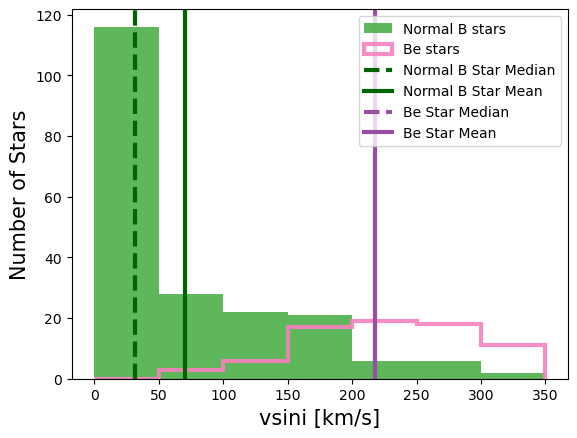

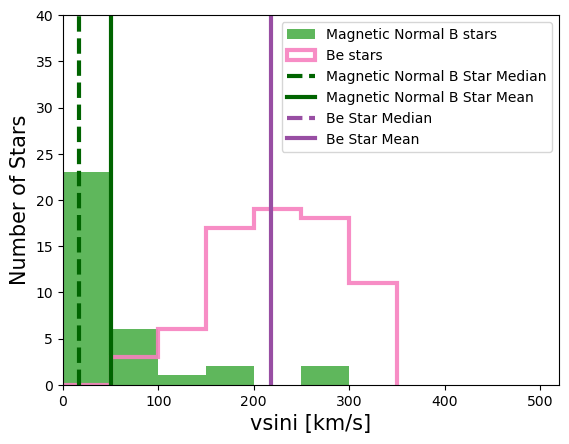

In [83]:
#makes some histograms


Bevsini=StarData['vsini-estimate']

binwidth=50
bins=np.arange(0, max(Bevsini) + binwidth, binwidth)

plt.hist(np.abs(Bstar_vsini),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf',histtype='step',linewidth=3)

#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
plt.axvline(np.median(np.abs(Bstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
plt.axvline(np.mean(np.abs(Bstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,20)
#plt.xlim(0,2000)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()


plt.hist(np.abs(MBstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf',histtype='step',linewidth=3)

#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
plt.axvline(np.median(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Magnetic Normal B Star Median')
plt.axvline(np.mean(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Magnetic Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')
plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,40)
plt.xlim(0,520)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()

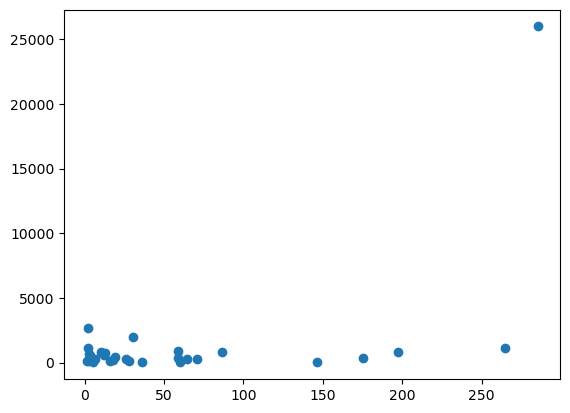

In [84]:
plt.scatter(MBstar_vsini,np.abs(MBstar_Bl))

In [85]:
A0=9600 #A0
B9=11400 #B9
B8=12300 #B8
B7=13500 #B7
B6=14300 #B6
B5=15200 #B5
B3=17600 #B3 
B2=21000 #B2 
B1=23000 #B1 
B0=29200 #B0
O9=37800 #O9

T_thresh=B3

B02T=np.array([])
B02vsini=np.array([])
B02Bl=np.array([])
B3pT=np.array([])
B3pvsini=np.array([])
B3pBl=np.array([])
for i in range(Bstar_T.size):
    if Bstar_T[i]>=T_thresh:
        B02T=np.append(B02T,Bstar_T[i])
        B02vsini=np.append(B02vsini,Bstar_vsini[i])
        B02Bl=np.append(B02Bl,Bstar_Bl[i])
    if Bstar_T[i]<T_thresh:
        B3pT=np.append(B3pT,Bstar_T[i])
        B3pvsini=np.append(B3pvsini,Bstar_vsini[i])
        B3pBl=np.append(B3pBl,Bstar_Bl[i])

MB02T=np.array([])
MB02vsini=np.array([])
MB02Bl=np.array([])
MB3pT=np.array([])
MB3pvsini=np.array([])
MB3pBl=np.array([])
for i in range(MBstar_T.size):
    if MBstar_T[i]>=T_thresh:
        MB02T=np.append(MB02T,MBstar_T[i])
        MB02vsini=np.append(MB02vsini,MBstar_vsini[i])
        MB02Bl=np.append(MB02Bl,MBstar_Bl[i])
    if MBstar_T[i]<T_thresh:
        MB3pT=np.append(MB3pT,MBstar_T[i])
        MB3pvsini=np.append(MB3pvsini,MBstar_vsini[i])
        MB3pBl=np.append(MB3pBl,MBstar_Bl[i])

Bestar_vsini=StarData['vsini-estimate']
#Bestar_vsini=StarData['Adopted-vsini']
Bestar_T=StarData['T']

Be02T=np.array([])
Be02vsini=np.array([])
Be02Bl=np.array([])
Be3pT=np.array([])
Be3pvsini=np.array([])
Be3pBl=np.array([])
for i in range(Bestar_T.size):
    if Bestar_T[i]>=T_thresh:
        Be02T=np.append(Be02T,Bestar_T[i])
        Be02vsini=np.append(Be02vsini,Bestar_vsini[i])
        #Be02Bl=np.append(Be02Bl,Bestar_Bl[i])
    if Bestar_T[i]<T_thresh:
        Be3pT=np.append(Be3pT,Bestar_T[i])
        Be3pvsini=np.append(Be3pvsini,Bestar_vsini[i])
        #Be3+Bl=np.append(Be3+Bl,Bestar_Bl[i])

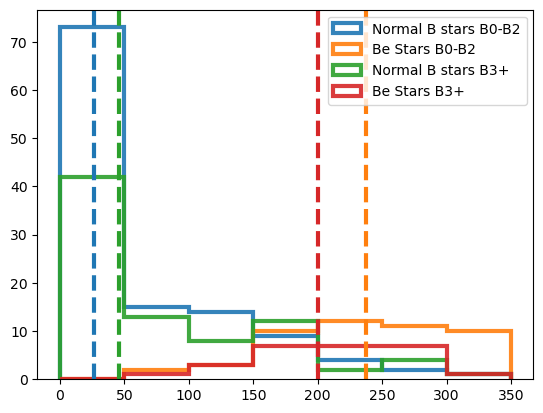

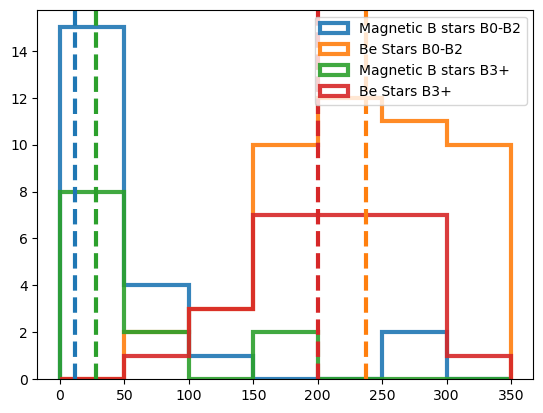

In [86]:
binwidth=50
bins=np.arange(0, max(Bestar_vsini) + binwidth, binwidth)

plt.hist(np.abs(B02vsini),label='Normal B stars B0-B2',bins=bins,alpha=0.9,histtype='step',linewidth=3)
plt.hist(Be02vsini,label='Be Stars B0-B2',bins=bins,alpha=0.9,histtype='step',linewidth=3)

plt.hist(np.abs(B3pvsini),label='Normal B stars B3+',bins=bins,alpha=0.9,histtype='step',linewidth=3)
plt.hist(Be3pvsini,label='Be Stars B3+',bins=bins,alpha=0.9,histtype='step',linewidth=3)


plt.axvline(np.nanmedian(np.abs(B02vsini)),linewidth=3,alpha=1,linestyle='dashed',color='C0')
plt.axvline(np.nanmedian(np.abs(Be02vsini)),linewidth=3,alpha=1,linestyle='dashed',color='C1')
plt.axvline(np.nanmedian(np.abs(B3pvsini)),linewidth=3,alpha=1,linestyle='dashed',color='C2')
plt.axvline(np.nanmedian(np.abs(Be3pvsini)),linewidth=3,alpha=1,linestyle='dashed',color='C3')



plt.legend()
plt.show()




plt.hist(np.abs(MB02vsini),label='Magnetic B stars B0-B2',bins=bins,alpha=0.9,histtype='step',linewidth=3)
plt.hist(Be02vsini,label='Be Stars B0-B2',bins=bins,alpha=0.9,histtype='step',linewidth=3)

plt.hist(np.abs(MB3pvsini),label='Magnetic B stars B3+',bins=bins,alpha=0.9,histtype='step',linewidth=3)
plt.hist(Be3pvsini,label='Be Stars B3+',bins=bins,alpha=0.9,histtype='step',linewidth=3)

plt.axvline(np.nanmedian(np.abs(MB02vsini)),linewidth=3,alpha=1,linestyle='dashed',color='C0')
plt.axvline(np.nanmedian(np.abs(Be02vsini)),linewidth=3,alpha=1,linestyle='dashed',color='C1')
plt.axvline(np.nanmedian(np.abs(MB3pvsini)),linewidth=3,alpha=1,linestyle='dashed',color='C2')
plt.axvline(np.nanmedian(np.abs(Be3pvsini)),linewidth=3,alpha=1,linestyle='dashed',color='C3')


plt.legend()
plt.show()

In [87]:
A0=9600. #A0
B9=11400. #B9
B8=12300. #B8
B7=13500. #B7
B6=14300. #B6
B5=15200. #B5
B3=17600. #B3 
B2=21000. #B2 
B1=23000. #B1 
B0=29200. #B0
O9=37800. #O9

Bstars=pd.DataFrame([Bstar_Bl,Bstar_T,Bstar_vsini],['Bl','T','vsini']).T
Bestars=pd.DataFrame([Bestar_T,Bestar_vsini],['T','vsini']).T

MBstars=pd.DataFrame([MBstar_Bl,MBstar_T,MBstar_vsini],['Bl','T','vsini']).T


In [88]:
B9vsini=Bstars['vsini'][np.where(((Bstars['T'].values>A0) & (Bstars['T'].values<=B9)))[0]]
B8vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B9) & (Bstars['T'].values<=B8)))[0]]
B7vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B8) & (Bstars['T'].values<=B7)))[0]]
B6vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B7) & (Bstars['T'].values<=B6)))[0]]
B5vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B6) & (Bstars['T'].values<=B5)))[0]]
B34vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B5) & (Bstars['T'].values<=B3)))[0]]
B2vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B3) & (Bstars['T'].values<=B2)))[0]]
B1vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B2) & (Bstars['T'].values<=B1)))[0]]
B0vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B1) & (Bstars['T'].values<=B0)))[0]]
O9vsini=Bstars['vsini'][np.where(((Bstars['T'].values>B0) & (Bstars['T'].values<=O9)))[0]]

MB9vsini=MBstars['vsini'][np.where(((MBstars['T'].values>A0) & (MBstars['T'].values<=B9)))[0]]
MB8vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B9) & (MBstars['T'].values<=B8)))[0]]
MB7vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B8) & (MBstars['T'].values<=B7)))[0]]
MB6vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B7) & (MBstars['T'].values<=B6)))[0]]
MB5vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B6) & (MBstars['T'].values<=B5)))[0]]
MB34vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B5) & (MBstars['T'].values<=B3)))[0]]
MB2vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B3) & (MBstars['T'].values<=B2)))[0]]
MB1vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B2) & (MBstars['T'].values<=B1)))[0]]
MB0vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B1) & (MBstars['T'].values<=B0)))[0]]
MO9vsini=MBstars['vsini'][np.where(((MBstars['T'].values>B0) & (MBstars['T'].values<=O9)))[0]]

Be9vsini=Bestars['vsini'][np.where(((Bestars['T'].values>A0) & (Bestars['T'].values<=B9)))[0]]
Be8vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B9) & (Bestars['T'].values<=B8)))[0]]
Be7vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B8) & (Bestars['T'].values<=B7)))[0]]
Be6vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B7) & (Bestars['T'].values<=B6)))[0]]
Be5vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B6) & (Bestars['T'].values<=B5)))[0]]
Be34vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B5) & (Bestars['T'].values<=B3)))[0]]
Be2vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B3) & (Bestars['T'].values<=B2)))[0]]
Be1vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B2) & (Bestars['T'].values<=B1)))[0]]
Be0vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B1) & (Bestars['T'].values<=B0)))[0]]
Oe9vsini=Bestars['vsini'][np.where(((Bestars['T'].values>B0) & (Bestars['T'].values<=O9)))[0]]

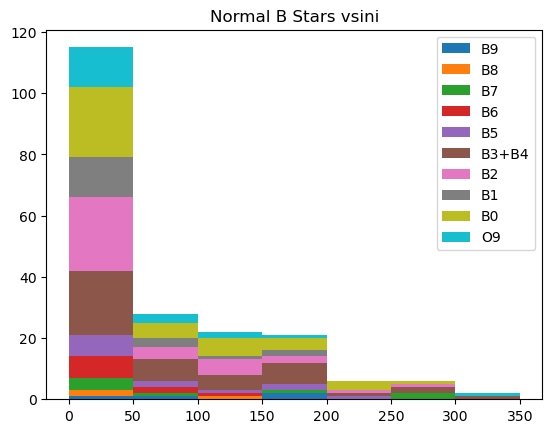

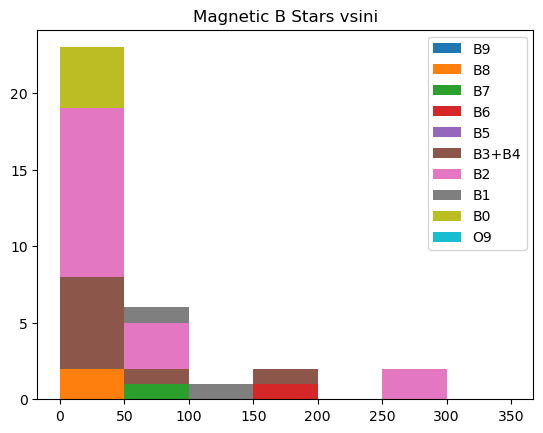

c:\Users\pjsta\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\pjsta\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


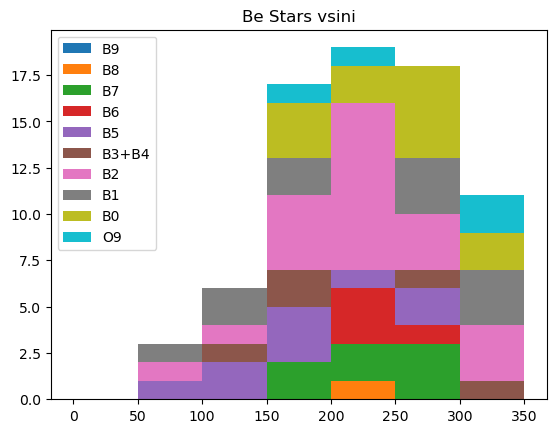

In [89]:
binwidth=50
bins=np.arange(0, max(Bestar_vsini) + binwidth, binwidth)

plt.title('Normal B Stars vsini')
plt.hist([B9vsini,B8vsini,B7vsini,B6vsini,B5vsini,B34vsini,B2vsini,B1vsini,B0vsini,O9vsini],bins=bins,histtype='barstacked',label=['B9','B8','B7','B6','B5','B3+B4','B2','B1','B0','O9'])
plt.legend()
plt.show()

plt.title('Magnetic B Stars vsini')
plt.hist([MB9vsini,MB8vsini,MB7vsini,MB6vsini,MB5vsini,MB34vsini,MB2vsini,MB1vsini,MB0vsini,MO9vsini],bins=bins,histtype='barstacked',label=['B9','B8','B7','B6','B5','B3+B4','B2','B1','B0','O9'])
plt.legend()
plt.show()

plt.title('Be Stars vsini')
plt.hist([Be9vsini,Be8vsini,Be7vsini,Be6vsini,Be5vsini,Be34vsini,Be2vsini,Be1vsini,Be0vsini,Oe9vsini],bins=bins,histtype='barstacked',label=['B9','B8','B7','B6','B5','B3+B4','B2','B1','B0','O9'])
plt.legend()
plt.show()

In [90]:
MB9Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>A0) & (MBstars['T'].values<=B9)))[0]])
MB8Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B9) & (MBstars['T'].values<=B8)))[0]])
MB7Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B8) & (MBstars['T'].values<=B7)))[0]])
MB6Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B7) & (MBstars['T'].values<=B6)))[0]])
MB5Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B6) & (MBstars['T'].values<=B5)))[0]])
MB34Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B5) & (MBstars['T'].values<=B3)))[0]])
MB2Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B3) & (MBstars['T'].values<=B2)))[0]])
MB1Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B2) & (MBstars['T'].values<=B1)))[0]])
MB0Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B1) & (MBstars['T'].values<=B0)))[0]])
MO9Bl=np.abs(MBstars['Bl'][np.where(((MBstars['T'].values>B0) & (MBstars['T'].values<=O9)))[0]])

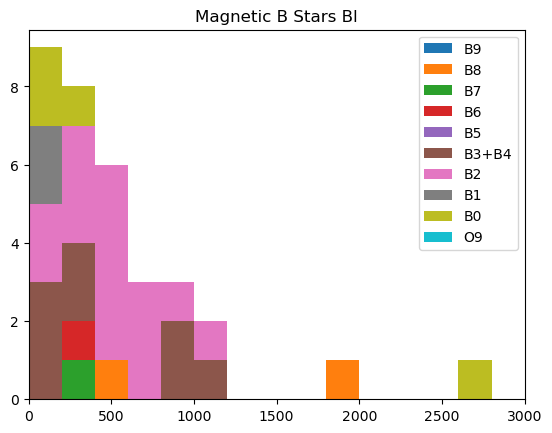

In [91]:
binwidth=200
bins=np.arange(0, max(np.abs(MBstar_Bl)) + binwidth, binwidth)
plt.title('Magnetic B Stars Bl')
plt.hist([MB9Bl,MB8Bl,MB7Bl,MB6Bl,MB5Bl,MB34Bl,MB2Bl,MB1Bl,MB0Bl,MO9Bl],bins=bins,histtype='barstacked',label=['B9','B8','B7','B6','B5','B3+B4','B2','B1','B0','O9'])
plt.legend()
plt.xlim(0,3000)
plt.show()

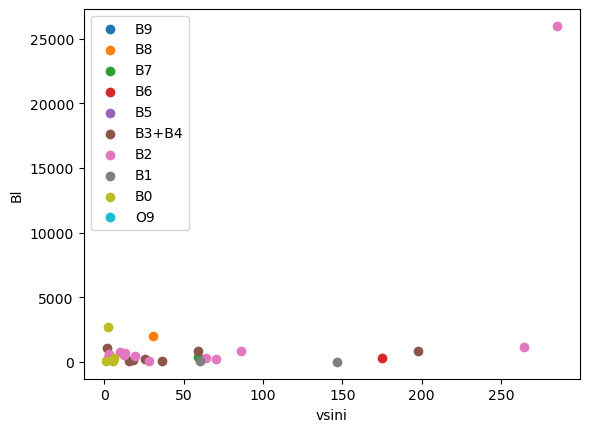

In [92]:
Mbvsini=[MB9vsini,MB8vsini,MB7vsini,MB6vsini,MB5vsini,MB34vsini,MB2vsini,MB1vsini,MB0vsini,MO9vsini]
MbBl=[MB9Bl,MB8Bl,MB7Bl,MB6Bl,MB5Bl,MB34Bl,MB2Bl,MB1Bl,MB0Bl,MO9Bl]
labels=['B9','B8','B7','B6','B5','B3+B4','B2','B1','B0','O9']

for i in range(10):
    plt.scatter(Mbvsini[i],MbBl[i],label=labels[i])

plt.xlabel('vsini')
plt.ylabel('Bl')
plt.legend()
plt.show()

In [93]:
## Herbigs

import pandas as pd
sheet_id = '1VBDdnhHfk-QwqC1lOsHtMiNN2dNEcTH3fl2j1k0nKB4'
sheet_name = 'stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Bl'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [94]:
MD=Observations['Filename '][np.where(Observations['Hybrid Diagnosis ']=='MD')[0]].values
DD=Observations['Filename '][np.where(Observations['Hybrid Diagnosis ']=='DD')[0]].values
stars=Observations.groupby("Filename ",as_index=False).median()
stars2=StarData.groupby("HD or BD number",as_index=False).median()

MHerbstar_vsini=np.array([])
MHerbstar_Bl=np.array([])
MHerbstar_T=np.array([])
MHerbstar_name=np.array([])
MHerbstar_M=np.array([])
MHerbstar_Breakup=np.array([])
for i in range(MD.size):
    MHerbstar_vsini = np.append(MHerbstar_vsini,stars2['vsini '][stars2['HD or BD number']==MD[i]])
    MHerbstar_Bl = np.append(MHerbstar_Bl,stars['Bℓ ± σ (G).1'][stars['Filename ']==MD[i]])
    MHerbstar_T = np.append(MHerbstar_T,stars2['Teff (K)'][stars2['HD or BD number']==MD[i]])
    MHerbstar_name = np.append(MHerbstar_name,stars['Filename '][stars['Filename ']==MD[i]])
    MHerbstar_M = np.append(MHerbstar_M,stars2['M '][stars2['HD or BD number']==MD[i]])
    MHerbstar_Breakup = np.append(MHerbstar_Breakup,np.sqrt(const.G*stars2['M '][stars2['HD or BD number']==MD[i]].values*u.Msun/stars2['R '][stars2['HD or BD number']==MD[i]].values/u.Rsun).to(u.km/u.s)*u.s/u.km)


for i in range(DD.size):
    MHerbstar_vsini = np.append(MHerbstar_vsini,stars2['vsini '][stars2['HD or BD number']==DD[i]])
    MHerbstar_Bl = np.append(MHerbstar_Bl,stars['Bℓ ± σ (G).1'][stars['Filename ']==DD[i]])
    MHerbstar_T = np.append(MHerbstar_T,stars2['Teff (K)'][stars2['HD or BD number']==DD[i]])
    MHerbstar_name = np.append(MHerbstar_name,stars['Filename '][stars['Filename ']==DD[i]])
    MHerbstar_M = np.append(MHerbstar_M,stars2['M '][stars2['HD or BD number']==DD[i]])
    MHerbstar_Breakup = np.append(MHerbstar_Breakup,np.sqrt(const.G*stars2['M '][stars2['HD or BD number']==DD[i]].values*u.Msun/stars2['R '][stars2['HD or BD number']==DD[i]].values/u.Rsun).to(u.km/u.s)*u.s/u.km)

Herbstar_M=np.array([])
Herbstar_vsini=np.array([])
Herbstar_Bl=np.array([])
Herbstar_T=np.array([])
Herbstar_name=np.array([])
Herbstar_Breakup=np.array([])
for i in range(stars['Filename '].size):
    if (stars['Filename '][i] not in MD) and (stars['Filename '][i] not in DD):
        Herbstar_vsini = np.append(Herbstar_vsini,stars2['vsini '][i])
        Herbstar_Bl = np.append(Herbstar_Bl,stars['Bℓ ± σ (G).1'][i])
        Herbstar_T = np.append(Herbstar_T,stars2['Teff (K)'][i])
        Herbstar_name = np.append(Herbstar_name,stars['Filename '][i])
        Herbstar_Breakup = np.append(Herbstar_Breakup,np.sqrt(const.G*stars2['M '][i]*u.Msun/stars2['R '][i]/u.Rsun).to(u.km/u.s)*u.s/u.km)
        Herbstar_M = np.append(Herbstar_M,stars2['M '][i])




C:\Users\pjsta\AppData\Local\Temp\ipykernel_30964\4276084599.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars=Observations.groupby("Filename ",as_index=False).median()
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30964\4276084599.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars2=StarData.groupby("HD or BD number",as_index=False).median()


In [95]:
m35p=stars2['vsini '][np.where(stars2['M ']>=3.0)[0]].values
mimes=Bstar_vsini.size+Bevsini.size
Mm35p=MHerbstar_vsini[np.where(MHerbstar_M>=3.0)]

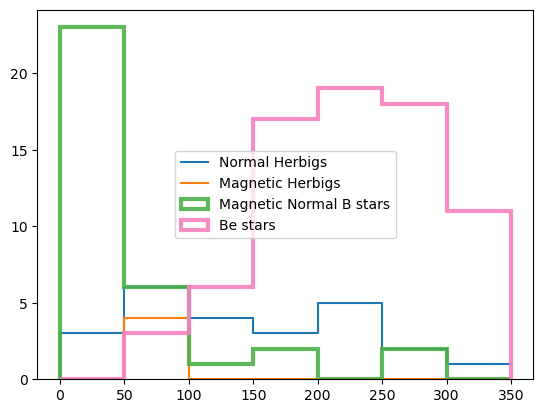

In [96]:
binwidth=50
bins=np.arange(0, max(Herbstar_vsini) + binwidth, binwidth)
#plt.hist(Herbstar_vsini,bins=bins)
#plt.hist(m35p,bins=bins)
#plt.step(np.histogram(Herbstar_vsini,bins=bins)[1][1:],np.histogram(Herbstar_vsini,bins=bins)[0])

plt.step(np.histogram(m35p,bins=bins)[1],np.insert(np.histogram(m35p,bins=bins)[0],0,0),color='C0',label='Normal Herbigs')
plt.step(np.histogram(Mm35p,bins=bins)[1],np.insert(np.histogram(Mm35p,bins=bins)[0],0,0),color='C1',label='Magnetic Herbigs')

plt.hist(np.abs(MBstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9,histtype='step',linewidth=3)
#plt.hist(np.abs(Bstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9,histtype='step',linewidth=3)
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf',histtype='step',linewidth=3)
plt.legend()

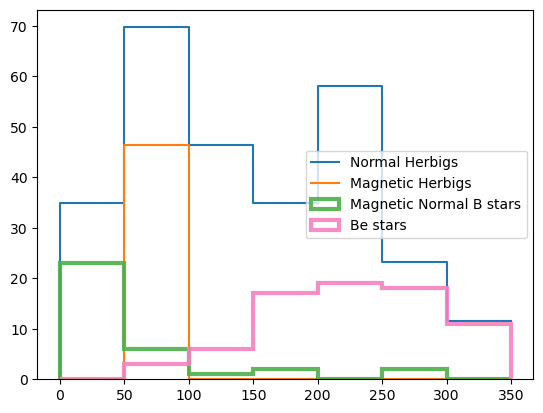

In [97]:
binwidth=50
bins=np.arange(0, max(Herbstar_vsini) + binwidth, binwidth)
#plt.hist(Herbstar_vsini,bins=bins)
#plt.hist(m35p,bins=bins)
#plt.step(np.histogram(Herbstar_vsini,bins=bins)[1][1:],np.histogram(Herbstar_vsini,bins=bins)[0])

plt.step(np.histogram(m35p,bins=bins)[1],np.insert(np.histogram(m35p,bins=bins)[0],0,0)*mimes/m35p.size,color='C0',label='Normal Herbigs')
plt.step(np.histogram(Mm35p,bins=bins)[1],np.insert(np.histogram(Mm35p,bins=bins)[0],0,0)*mimes/m35p.size,color='C1',label='Magnetic Herbigs')

plt.hist(np.abs(MBstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9,histtype='step',linewidth=3)
#plt.hist(np.abs(Bstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9,histtype='step',linewidth=3)
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf',histtype='step',linewidth=3)
plt.legend()

In [98]:
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData2=pd.read_csv(url)
BeMass=(((StarData2['T']/5772)**4)**(1/2.5))
BeRadius=BeMass**0.8
import astropy.constants as const
import astropy.units as u
BeBreakup=np.array([])
for i in range(BeMass.size):
    BeBreakup=np.append(BeBreakup,((const.G*BeMass[i]*u.Msun/BeRadius[i]/u.Rsun)**.5).to(u.km/u.s)*u.s/u.km)

BMass=(((Bstar_T/5772)**4)**(1/2.5))
BRadius=BMass**0.8
BBreakup=np.array([])
for i in range(BMass.size):
    BBreakup=np.append(BBreakup,((const.G*BMass[i]*u.Msun/BRadius[i]/u.Rsun)**.5).to(u.km/u.s)*u.s/u.km)

MBMass=(((MBstar_T/5772)**4)**(1/2.5))
MBRadius=MBMass**0.8
MBBreakup=np.array([])
for i in range(MBMass.size):
    MBBreakup=np.append(MBBreakup,((const.G*MBMass[i]*u.Msun/MBRadius[i]/u.Rsun)**.5).to(u.km/u.s)*u.s/u.km)


In [99]:
m35p=stars2['vsini '][np.where(stars2['M ']>=3.5)[0]].values
mimes=Bstar_vsini.size+Bevsini.size
Mm35p=MHerbstar_vsini[np.where(MHerbstar_M>=3.5)]

m35pBreak=np.sqrt((stars2['M '][np.where(stars2['M ']>=3.5)[0]].values*u.Msun*const.G)/(stars2['R '][np.where(stars2['M ']>=3.5)[0]].values*u.Rsun)).to(u.km/u.s)*u.s/u.km
Mm35pBreak=MHerbstar_Breakup[np.where(MHerbstar_M>=3.5)]


Text(0.5, 0, 'Wsini')

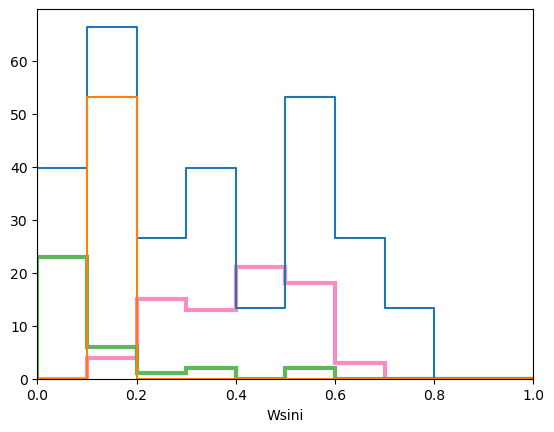

In [100]:
binwidth=0.1
bins=np.arange(0, 1.1, binwidth)
plt.hist(Bevsini/BeBreakup,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf',histtype='step',linewidth=3)
#plt.hist(Bstar_vsini/BBreakup,label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9,histtype='step',linewidth=3)
plt.hist(MBstar_vsini/MBBreakup,label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9,histtype='step',linewidth=3)

plt.step(np.histogram(m35p/m35pBreak,bins=bins)[1],np.insert(np.histogram(m35p/m35pBreak,bins=bins)[0],0,0)*mimes/m35p.size,color='C0',label='Normal Herbigs')
plt.step(np.histogram(Mm35p/Mm35pBreak,bins=bins)[1],np.insert(np.histogram(Mm35p/Mm35pBreak,bins=bins)[0],0,0)*mimes/m35p.size,color='C1',label='Magnetic Herbigs')
plt.xlim(0,1.0)
plt.xlabel('Wsini')

Text(0.5, 0, 'Wsini')

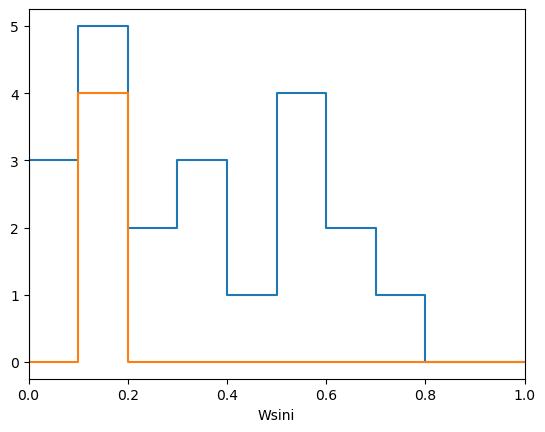

In [101]:
plt.step(np.histogram(m35p/m35pBreak,bins=bins)[1],np.insert(np.histogram(m35p/m35pBreak,bins=bins)[0],0,0),color='C0',label='Normal Herbigs')
plt.step(np.histogram(Mm35p/Mm35pBreak,bins=bins)[1],np.insert(np.histogram(Mm35p/Mm35pBreak,bins=bins)[0],0,0),color='C1',label='Magnetic Herbigs')
plt.xlim(0,1.0)
plt.xlabel('Wsini')

Text(0, 0.5, '% of stars')

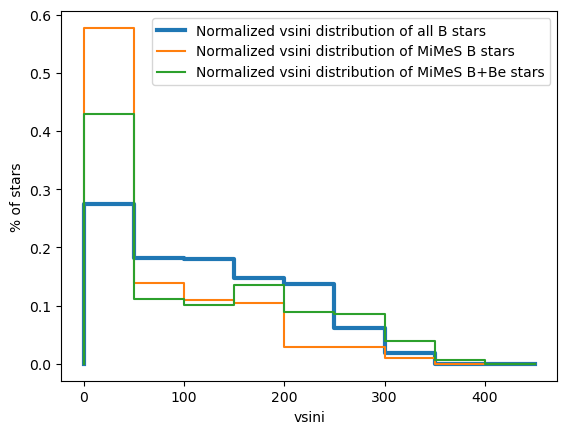

In [105]:
allB=np.array([0,60+78+118,35+50+85,38+40+90,30+38+70,25+33+70,12+10+35,8+4+5,0+0+0,0+0+0])
bins2=np.array([0,50,100,150,200,250,300,350,400,450])
plt.step(bins2,allB/allB.sum(),label='Normalized vsini distribution of all B stars',linewidth=3)
plt.step(np.histogram(Bstar_vsini,bins=bins2)[1],np.insert(np.histogram(Bstar_vsini,bins=bins2)[0],0,0)/np.histogram(Bstar_vsini,bins=bins2)[0].sum(),label='Normalized vsini distribution of MiMeS B stars')
plt.step(np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[1],np.insert(np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[0],0,0)/np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[0].sum(),label='Normalized vsini distribution of MiMeS B+Be stars')
#plt.step(np.histogram(Herbstar_vsini,bins=bins2)[1],np.insert(np.histogram(Herbstar_vsini,bins=bins2)[0],0,0)/np.insert(np.histogram(Herbstar_vsini,bins=bins2)[0],0,0).sum(),label='Normalized vsini distribution of Herbig Ae/Be stars')

plt.legend()
plt.xlabel('vsini')
plt.ylabel('% of stars')


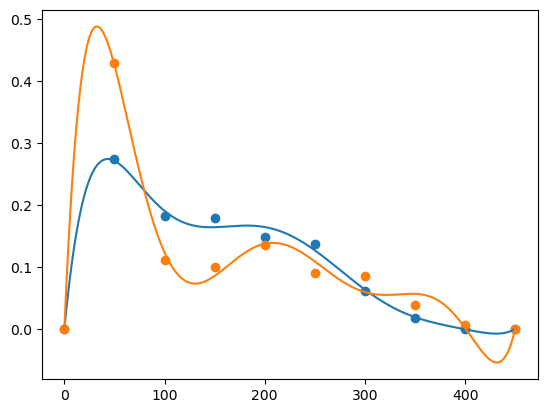

In [103]:
plt.scatter(bins2,allB/allB.sum())
p=np.polyfit(bins2,allB/allB.sum(),7)
plt.plot(np.arange(0,451,1),np.polyval(p,np.arange(0,451,1)))

plt.scatter(bins2,np.insert(np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[0],0,0)/np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[0].sum())
p2=np.polyfit(bins2,np.insert(np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[0],0,0)/np.histogram(np.nan_to_num(np.append(Bstar_vsini,Bevsini),100000),bins=bins2)[0].sum(),7)
plt.plot(np.arange(0,451,1),np.polyval(p2,np.arange(0,451,1)))


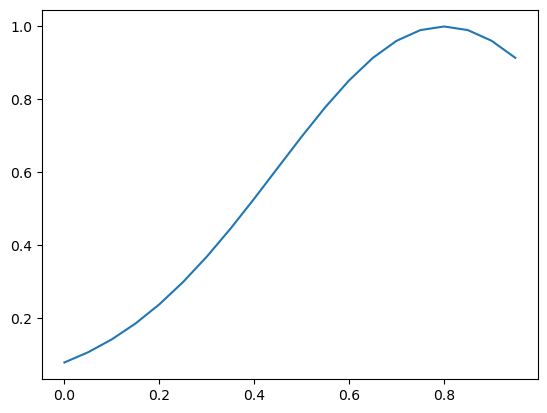

In [141]:
sinis=np.arange(0,1,0.05)
plt.plot(sinis,(np.exp(-(sinis-0.8)**2/0.5**2)))#/np.sum(np.exp(-(sinis-0.8)**2/0.5**2)))


(-0.1, 1.0)

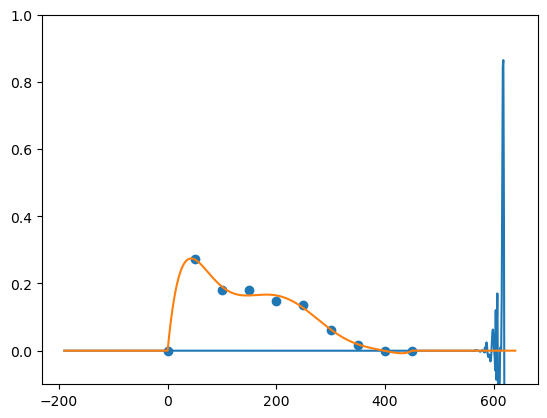

In [115]:
import scipy as sci
sig=(np.exp(-(sinis-0.8)**2/0.5**2))
a=sci.signal.deconvolve(np.pad(np.polyval(p,np.arange(0,451,1)),[190,190],constant_values=0),sig)
c=sci.signal.convolve(a[0],sig)
#print(a[0])
plt.plot(np.arange(0-190,451+190,1)[:-(len(np.arange(0-190,451+190,1))-len(a[0]))],a[0]/a[0].sum())
plt.scatter(bins2,allB/allB.sum())
plt.plot(np.arange(0-190,451+190,1),c+a[1])
plt.ylim(-0.1,1)

In [64]:
plt.plot(np.fft.irfft(np.fft.rfft(np.polyval(p,np.arange(0,451,1)))/np.interp(np.fft.rfftfreq(11),np.fft.rfftfreq(451),np.fft.rfft(np.polyval(p,np.arange(0,451,1))))))
#plt.plot(np.arange(0,451,1)[:400]-15,np.polyval(p,np.arange(0,451,1))[:400]/12)

ValueError: operands could not be broadcast together with shapes (226,) (6,) 

# 2. Comparison with Normal B Stars (Well Behaved Stars)


In [16]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0

Bstar_vsini=np.array([])
Bstar_Bz=np.array([])
for i in range(StarData['sigma'].size):
  if np.isnan(StarData['sigma'][i]):
    continue
  else:
    Bstar_Bz=np.append(Bstar_Bz,3*
    StarData['sigma'][i])
    Bstar_vsini=np.append(Bstar_vsini,StarData['vsini'][i])


MBstar_Bz=np.array([])
MBstar_vsini=np.array([])
for i in range(StarData['sigma'].size):
  if type(StarData['sigma'][i])!=str:
    if StarData['Det Flag'][i]!='ND':
      MBstar_Bz=np.append(MBstar_Bz,StarData['sigma'][i]*3)
      MBstar_vsini=np.append(MBstar_vsini,StarData['vsini'][i])

FileNotFoundError: [Errno 2] No such file or directory: '04-Bz-calculations/WellBehavedStars/hybrid_maskdepth0.02_tellClean_GOOD.csv'

In [ ]:
print('B star 3sig Upper limit median',np.median(np.abs(Bstar_Bz)),'mean',np.mean(np.abs(Bstar_Bz)))
print('Magnetic B star 3sig Upper limit median',np.median(np.abs(MBstar_Bz)),'mean',np.mean(np.abs(MBstar_Bz)))
print('Be star 3sig Upper limit median',np.median(np.abs(v_sig)),'mean',np.mean(np.abs(v_sig)))
#np.median(v_sig)

MBstar_Bz.size

#not random sample --> detection bias

In [ ]:
#makes some histograms

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0
binwidth=50

bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
#for i in range(MBstar_Bz.size):
#  plt.axvline(np.abs(MBstar_Bz[i]),color='C2',linewidth=1,alpha=0.5)
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,50)
plt.xlim(0,2000)
plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
plt.legend()
plt.show()


plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,50)
#plt.xlim(0,2000)
plt.title('3-sigma Upper limit (No Scaling)',size=15)
plt.legend()
plt.show()

plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,50)
#plt.xlim(0,2000)
plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
plt.legend()
plt.show()


In [ ]:
#makes some histograms
with PdfPages('{}04-Bz-calculations/3SigmaBz_hist.pdf'.format(path)) as pdf:
  for i in range(len(models)):
    model=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))

    #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
    v_sig=np.abs(model['V bz sig (G)'])*3.0

    modelall=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
    v_sigall=np.abs(modelall['V bz sig (G)'])*3.0

    binwidth=50
    bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)

    #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
    #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    #plt.ylabel('Number of Stars',size=15)
    #plt.ylim(0,50)
    #plt.xlim(0,2000)
    #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    ax.hist(v_sigall,label='{}'.format('All Be stars'),bins=bins,alpha=0.9,color='#f781bf') 
    ax.hist(v_sig,label='{}'.format('Well Behaved Be stars'),bins=bins,alpha=0.9,color='#f781bf',edgecolor='black')

    #plt.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
    #plt.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
    #plt.axvline(np.median(np.abs(v_sigall)),color='brown',linewidth=3,alpha=1,linestyle='dashed', label='All Be Star Median')
    #plt.axvline(np.mean(np.abs(v_sigall)),color='brown',linewidth=3,alpha=1,linestyle='solid', label='All Be Star Mean')
    #plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Well Behaved Be Star Median')
    #plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Well Behaved Be Star Mean')

    ax.set_xlabel('$3\sigma_{Bz}$ Upper Limits (G)',size=15)
    ax.set_ylabel('Number of Stars',size=15)
    ax.set_ylim(0,40)
    ax.set_xlim(0,2000)
    #plt.title('3-sigma Upper limit Comparison')#.format(models[i]),size=15)
    ax.set_title('3-sigma Upper limit {}'.format(models[i]),size=15)
    ax.legend()
    pdf.savefig(fig)
    '''
    plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
    plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    plt.ylabel('Number of Stars',size=15)
    plt.title('3-sigma Upper limit (No Scaling)',size=15)
    plt.legend()
    plt.show()


    plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
    plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    plt.ylabel('Number of Stars',size=15)
    plt.ylim(0,50)
    plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
    plt.legend()
    plt.show()
    '''

# 3. Model Comparisons

In [ ]:
with PdfPages('{}04-Bz-calculations/SigmaBz_hybridvnorm.pdf'.format(path)) as pdf:
    for i in range(4):

        model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz sig (G)'])

        modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
        v_sigall1=np.abs(modelall1['V bz sig (G)'])

        model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i+4]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz sig (G)'])

        modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i+4]))
        v_sigall2=np.abs(modelall2['V bz sig (G)'])


        fig, ax = plt.subplots(1,1, figsize=(10,5))

        ax.scatter(v_sigall1, v_sigall2, label='All Stars')
        ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax.legend()
        ax.set_xlabel('Hybrid Sig Bz')
        ax.set_ylabel('Normalzied Sig Bz')
        ax.set_title('{}'.format(models[i].split('_')[1]))
        ax.set_xlim(0,2000)
        ax.set_ylim(0,2000)
        pdf.savefig(fig)

In [ ]:
with PdfPages('{}04-Bz-calculations/Bz_hybridvnorm.pdf'.format(path)) as pdf:
    for i in range(4):

        model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz (G)'])

        modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
        v_sigall1=np.abs(modelall1['V bz (G)'])

        model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i+4]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz (G)'])

        modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i+4]))
        v_sigall2=np.abs(modelall2['V bz (G)'])


        fig, ax = plt.subplots(1,1, figsize=(10,5))

        ax.scatter(v_sigall1, v_sigall2, label='All Stars')
        ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax.legend()
        ax.set_xlabel('Hybrid Bz')
        ax.set_ylabel('Normalzied Bz')
        ax.set_title('{}'.format(models[i].split('_')[1]))
        ax.set_xlim(0,2000)
        ax.set_ylim(0,2000)
        pdf.savefig(fig)

(0.0, 1300.0)

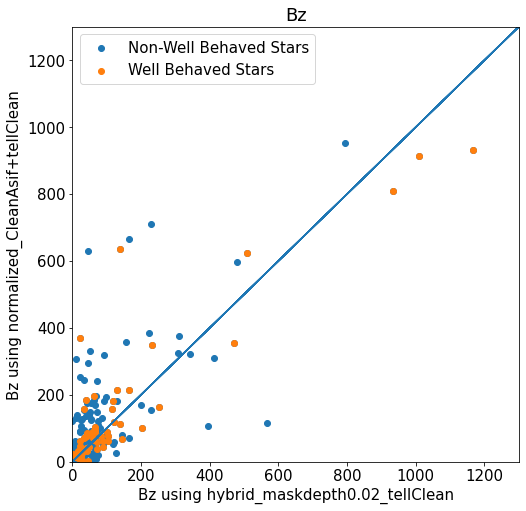

In [ ]:
i=1
j=6
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall1, v_sigall2, label='Non-Well Behaved Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.legend()
ax.set_xlabel('Bz using {}'.format(models[i]))
ax.set_ylabel('Bz using {}'.format(models[j]))
ax.set_title('Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

(0.0, 1300.0)

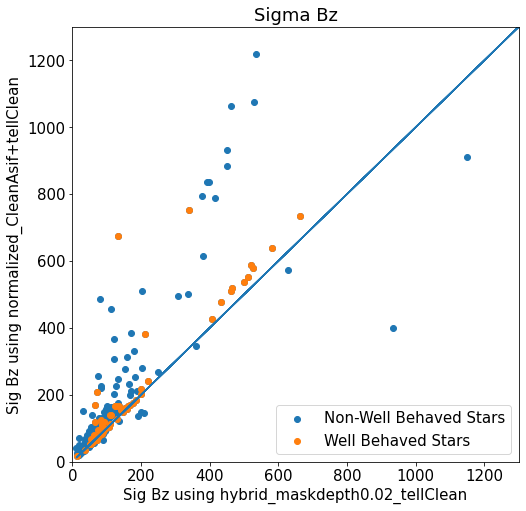

In [ ]:
i=1
j=6
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz sig (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz sig (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall1, v_sigall2, label='Non-Well Behaved Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.legend()
ax.set_xlabel('Sig Bz using {}'.format(models[i]))
ax.set_ylabel('Sig Bz using {}'.format(models[j]))
ax.set_title('Sigma Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

### All Combinations

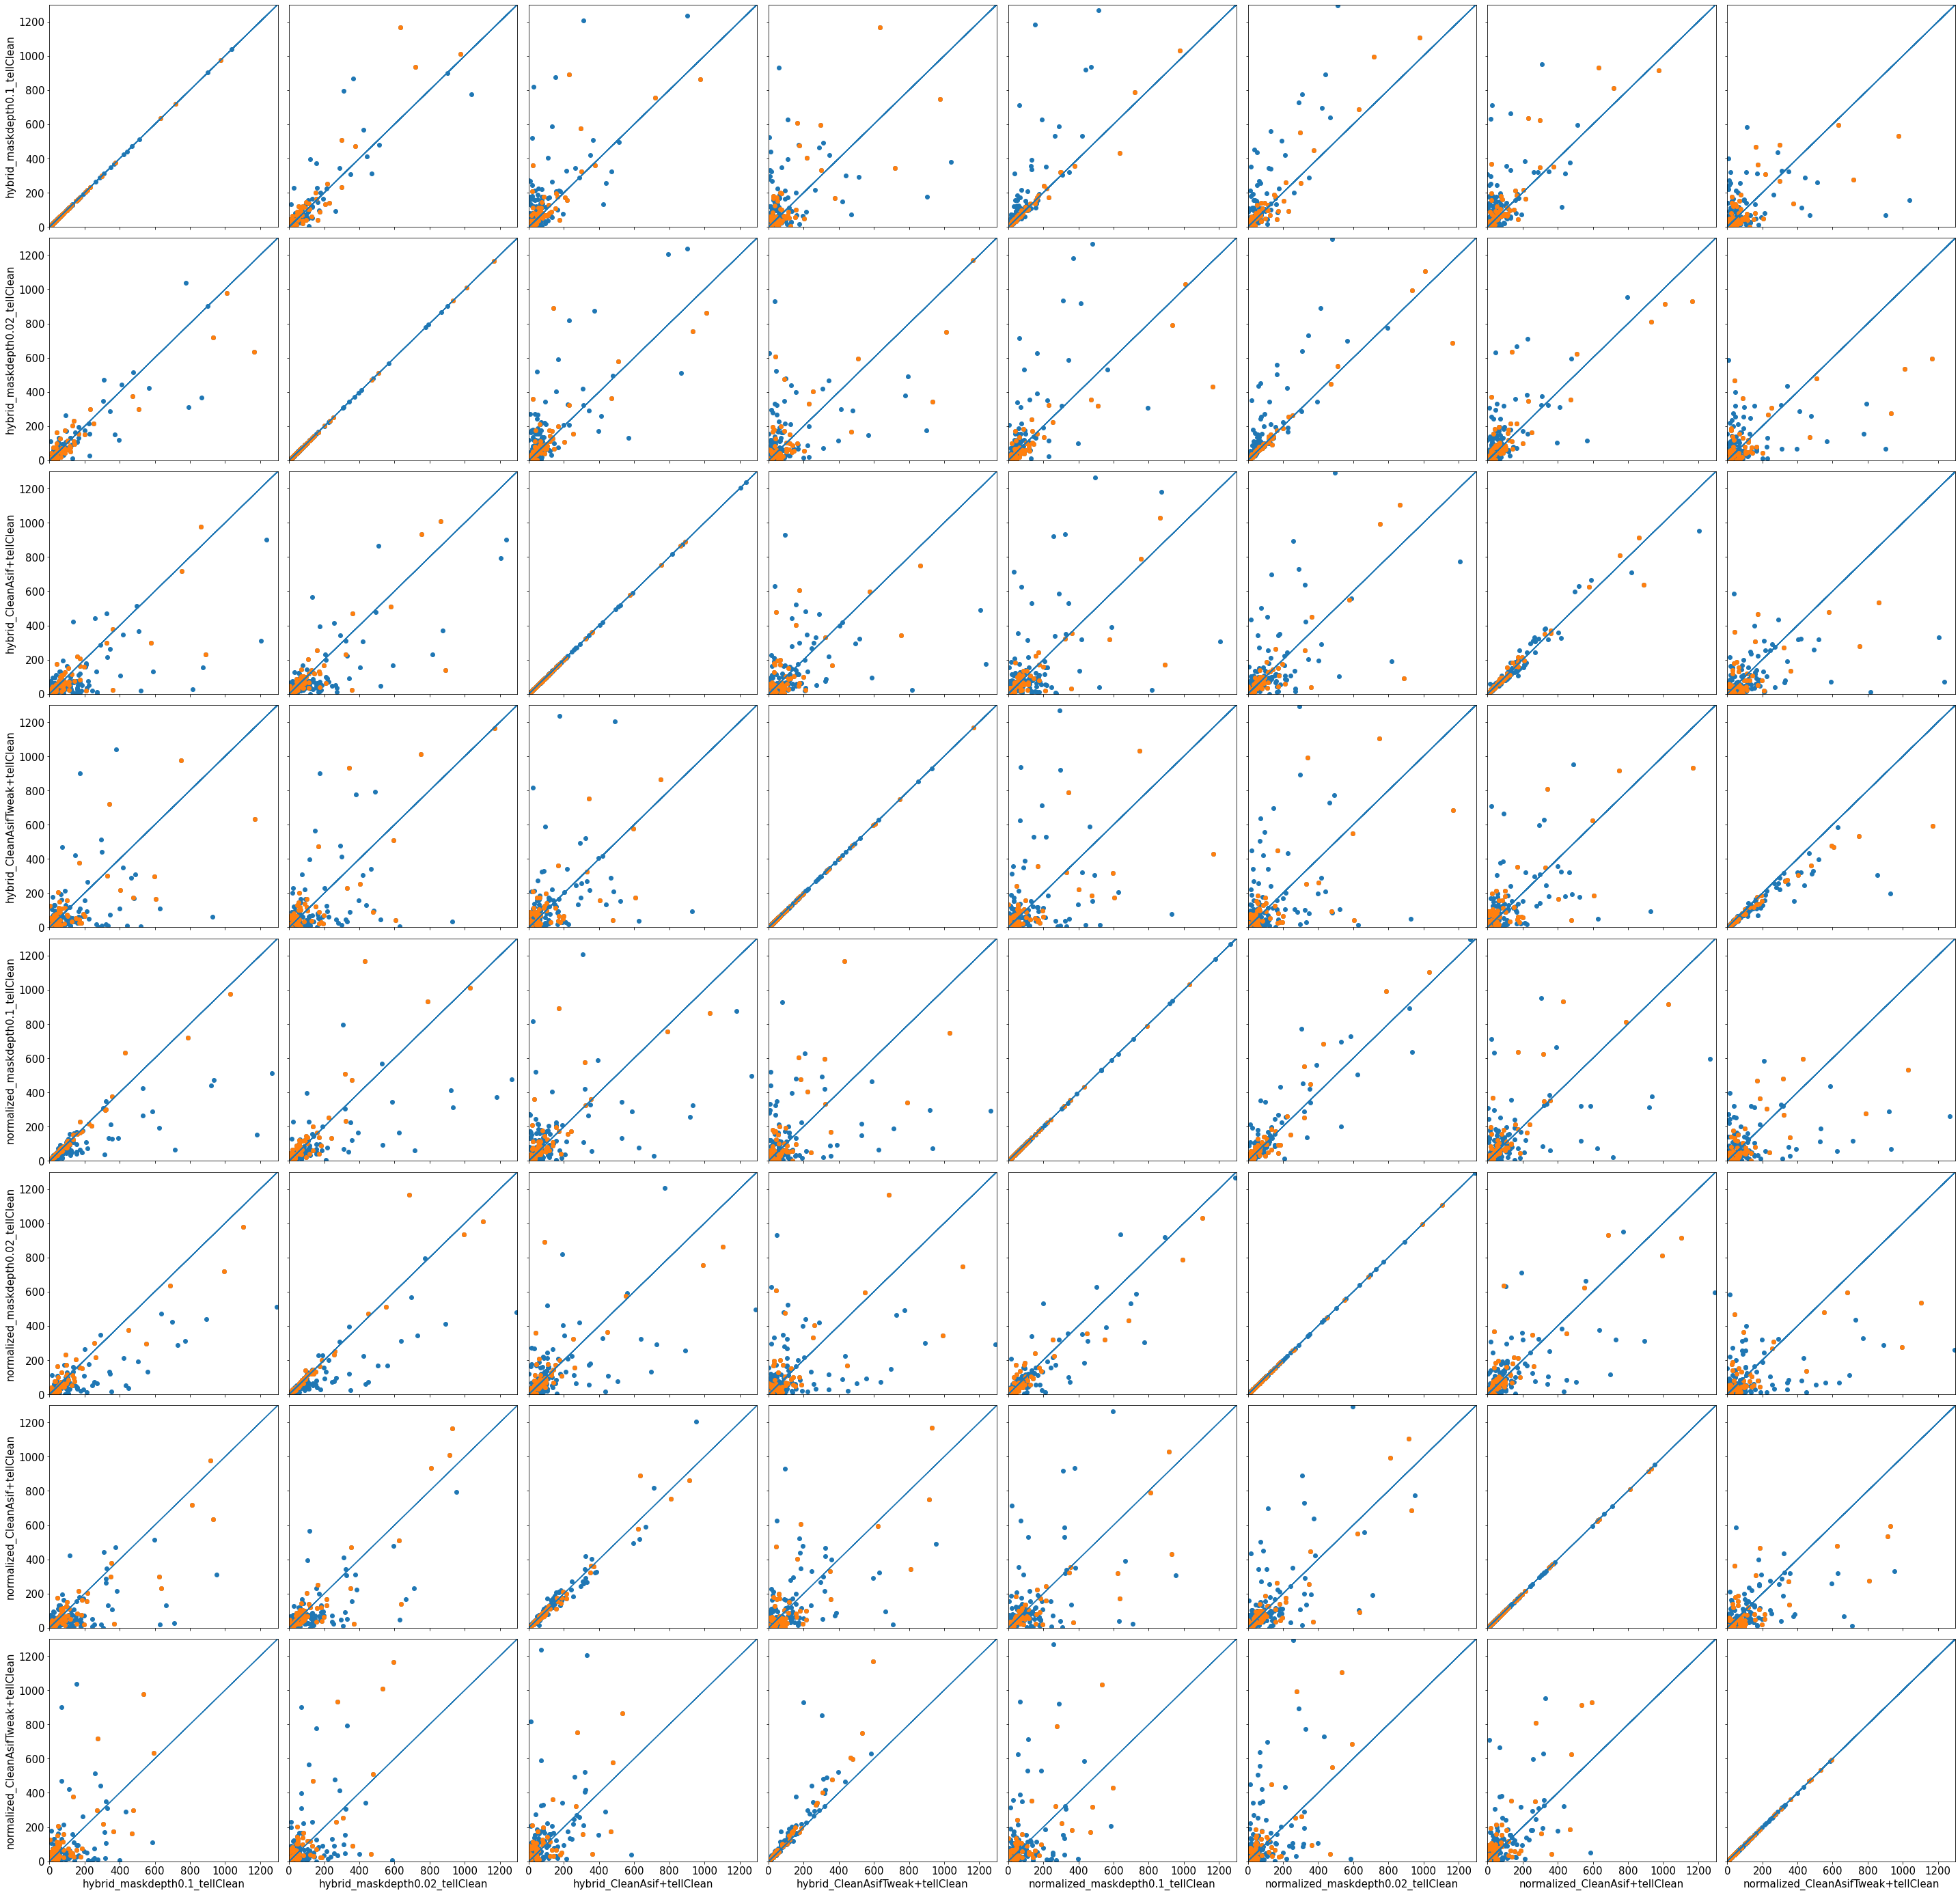

In [ ]:
fig, ax = plt.subplots(8,8, figsize=(50,50), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz (G)'])

        modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
        v_sigall1=np.abs(modelall1['V bz (G)'])

        model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz (G)'])

        modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
        v_sigall2=np.abs(modelall2['V bz (G)'])

        

        ax[i,j].scatter(v_sigall1, v_sigall2, label='All Stars')
        ax[i,j].scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax[i,j].plot(v_sigall1,v_sigall1)
        
        #ax[i,j].legend()
        #ax[i,j].set_xlabel('Bz from {}'.format(models[i]))
        #ax[i,j].set_ylabel('Bz from {}'.format(models[j]))
        #ax.set_title('{}'.format(models[i].split('_')[1]))

fig.subplots_adjust(hspace=0.05,wspace=0.05)
ax[0,0].set_xlim(0,1300)
ax[0,0].set_ylim(0,1300)
for i in range(8):
    for j in range(8):
        ax[7,j].set_xlabel('{}'.format(models[j]))
        ax[i,0].set_ylabel('{}'.format(models[i]))

(0.0, 1300.0)

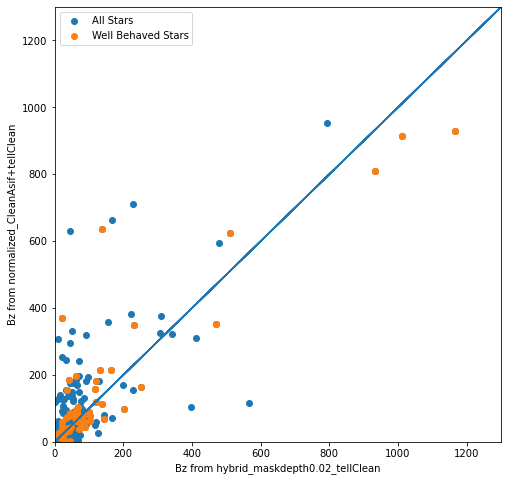

In [ ]:
i=1
j=6
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(v_sigall1, v_sigall2, label='All Stars')
ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.plot(v_sigall1,v_sigall1)
ax.legend()
ax.set_xlabel('Bz from {}'.format(models[i]))
ax.set_ylabel('Bz from {}'.format(models[j]))
#ax.set_title('{}'.format(models[i].split('_')[1]))
ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

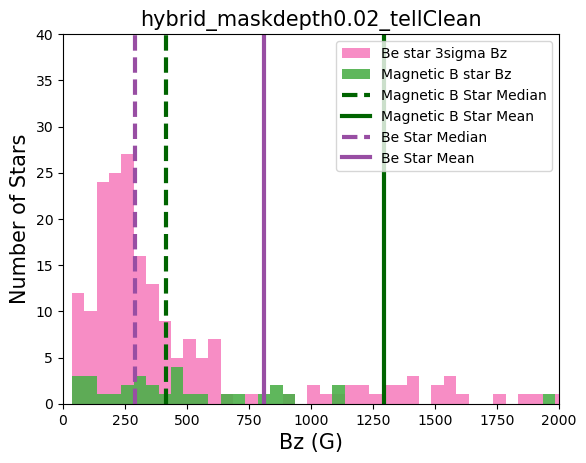

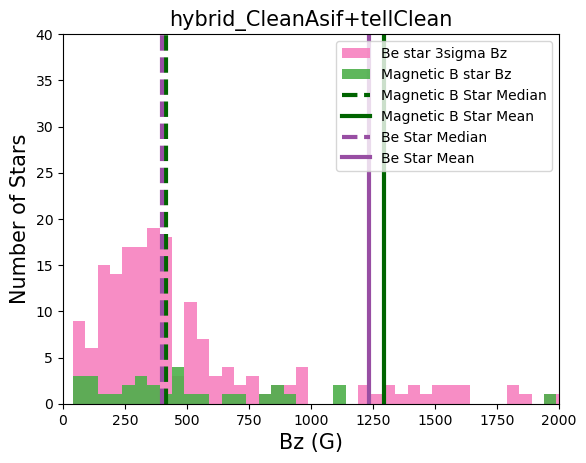

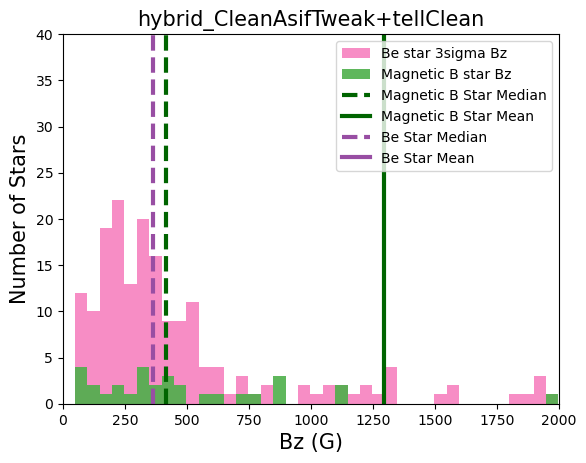

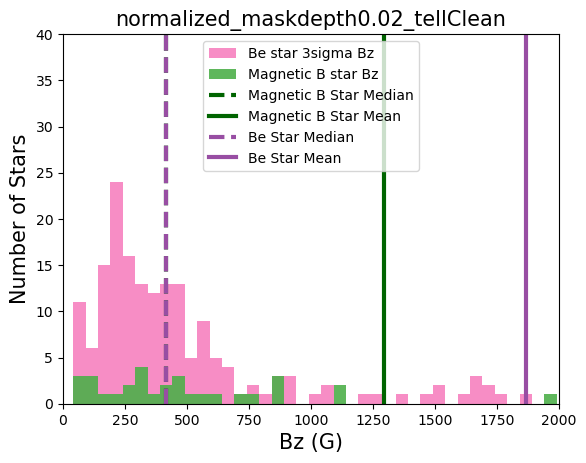

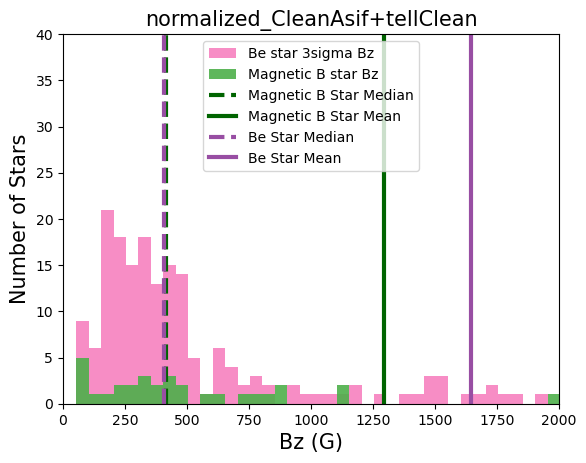

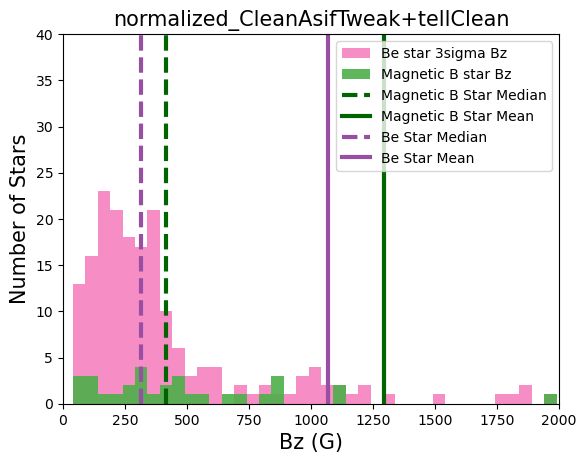

FileNotFoundError: [Errno 2] No such file or directory: 'G:/Shared drives/BeStarsMiMeS/UpdatedFiles/04-Bz-calculations/hybrid_SuperCleanAsif+tellClean.csv'

In [ ]:
#makes some histograms

for i in range(len(models)):

  #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model['V bz sig (G)'])*3.0

  binwidth=50
  bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
  
  #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  #plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,50)
  #plt.xlim(0,2000)
  #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
  #plt.legend()
  #plt.show()

  plt.hist(v_sig,label='{}'.format('Be star 3sigma Bz'),bins=bins,alpha=0.9,color='#f781bf')
  plt.hist(np.abs(MBstar_Bl),label='Magnetic B star Bz',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 


  plt.axvline(np.median(np.abs(MBstar_Bl)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Magnetic B Star Median')
  plt.axvline(np.mean(np.abs(MBstar_Bl)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Magnetic B Star Mean')
  plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
  plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

  plt.xlabel('Bz (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,40)
  plt.xlim(0,2000)
  plt.title('{}'.format(models[i]),size=15)
  plt.legend()
  plt.show()

'''
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.title('3-sigma Upper limit (No Scaling)',size=15)
  plt.legend()
  plt.show()


  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,50)
  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
  plt.legend()
  plt.show()
'''

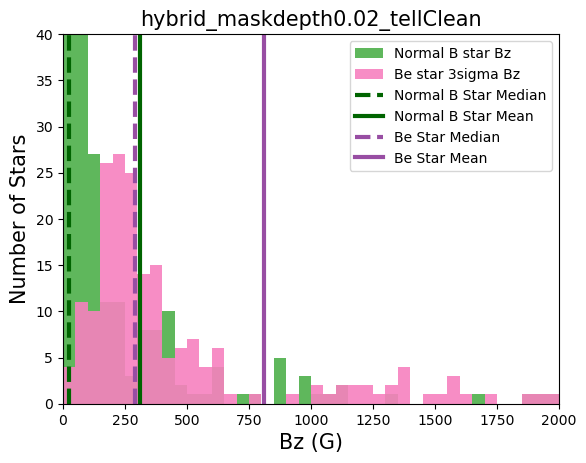

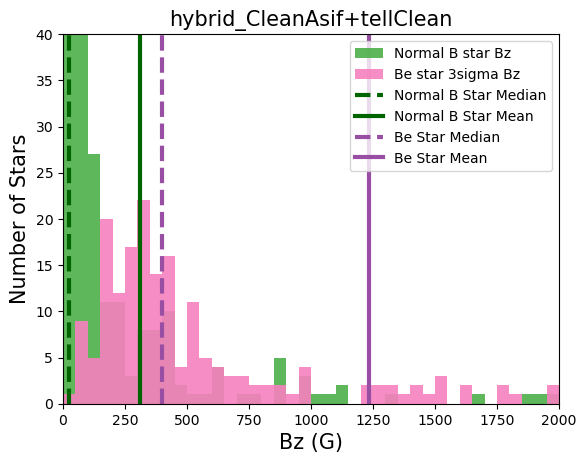

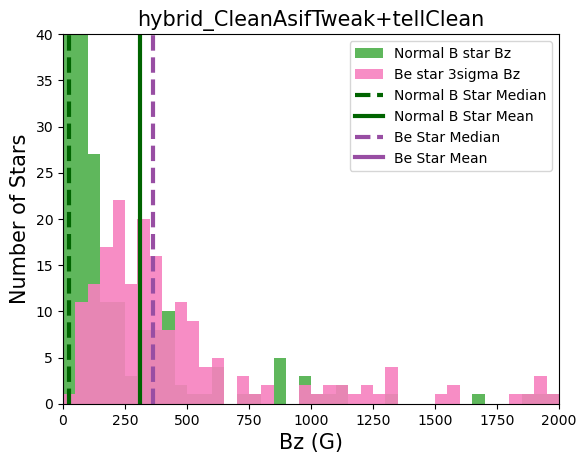

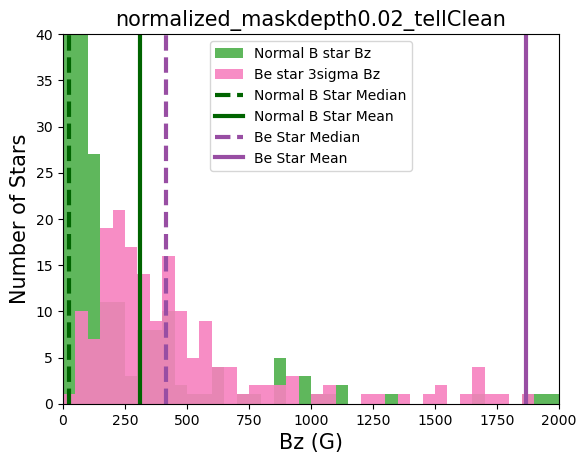

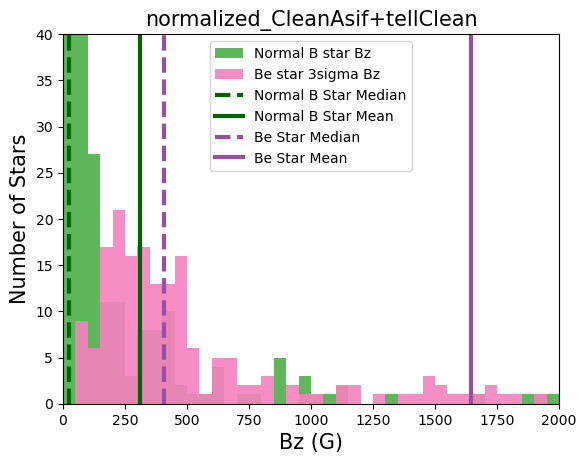

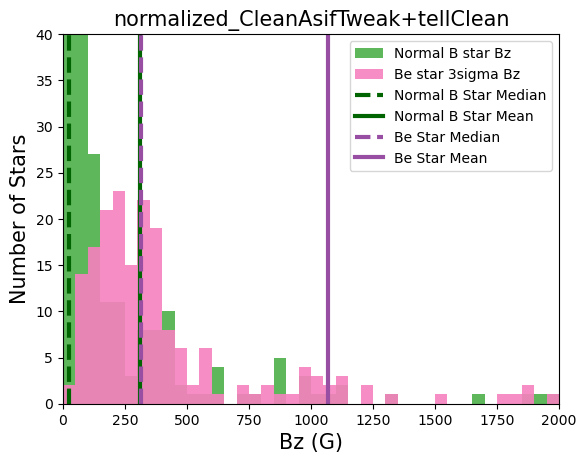

FileNotFoundError: [Errno 2] No such file or directory: 'G:/Shared drives/BeStarsMiMeS/UpdatedFiles/04-Bz-calculations/hybrid_SuperCleanAsif+tellClean.csv'

In [ ]:
#makes some histograms

for i in range(len(models)):

  #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model['V bz sig (G)'])*3.0

  binwidth=50
  bins=np.arange(0, max(v_sig) + binwidth, binwidth)
  
  #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  #plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,50)
  #plt.xlim(0,2000)
  #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
  #plt.legend()
  #plt.show()
  plt.hist(np.abs(Bstar_Bl),label='Normal B star Bz',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format('Be star 3sigma Bz'),bins=bins,alpha=0.9,color='#f781bf')

  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 


  plt.axvline(np.median(np.abs(Bstar_Bl)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
  plt.axvline(np.mean(np.abs(Bstar_Bl)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
  plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
  plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

  plt.xlabel('Bz (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,40)
  plt.xlim(0,2000)
  plt.title('{}'.format(models[i]),size=15)
  plt.legend()
  plt.show()

'''
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.title('3-sigma Upper limit (No Scaling)',size=15)
  plt.legend()
  plt.show()


  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,50)
  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
  plt.legend()
  plt.show()
'''